## Class 6

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [4]:
import plotly.express as px

In [5]:
%ls datasets/

adult.csv                  Cartwheeldata.csv  movies.csv
adultosenusat.csv          census.csv         nhanes_2015_2016.csv
airline_data.csv           coches.csv         pokemon.csv
antropometria00.csv        cwurData.csv       reg_data.csv
antropometria-dataset.csv  data.csv           sample_pivot.csv
Book3.csv                  headbrain.csv      tips.csv
Canada.xlsx                mic2.xlsx          weight-height.csv


In [6]:
path = 'datasets/mic2.xlsx'
df = pd.read_excel(path,
                  
                   engine = 'openpyxl'
                  )

In [7]:
df.head()

,Age,Sex,Ocupation,Monthly income,Price,Quality,Quantity,Availability,Taste,Flavours,...,Overal satisfaction,Consistency,Factor,Frowned,reason,Popular,My favorite,Kind,Preference,Recommend
0,31,Male,Research,">40, 000",5,5,5,4,4,5,...,4,4,Taste,No,NaN,Combo_VLM,Chocolate,More than one flavoured,agree,agree
1,25,Male,student,"<10,000",3,5,3,4,5,5,...,4,4,Taste,No,Quantity issues,Combo_VCS,Chocolate,More than one flavoured,neutral,neutral
2,45,Female,Teaching,">40, 000",3,4,4,4,3,4,...,4,4,Taste,No,NaN,Combo_VCS,Caramel,More than one flavoured,disagree,neutral
3,27,Male,Student,"<10,000",5,5,3,4,5,5,...,4,4,Taste,No,NaN,Combo_VCS,Strawbery,More than one flavoured,agree,agree
4,23,Female,Tutor,"10,000 - 20,000",5,5,4,4,5,5,...,5,5,Quality,No,NaN,Combo_VCS,Vanila,single flavoured,agree,Strongly agree


Categorizar la información, agregando una columna al final 

In [8]:
def categorizar(x): #en esta parte definimos la funcion que se categorizará
    if(0<= x <=19): # estas son las categorías
        return '<20'
    elif(20<= x <=29):
        return '20 - 29'
    elif(30<= x <= 39):
        return '30 - 39'
    else:
        return '>=40'

df['AgeGP'] = df.apply(
        lambda tbl: categorizar(tbl['Age']), #En este punto estamos agregando la columna ageGP y le decimos que utilice la funcion categorizar
        axis = 1 )

In [9]:
df.head(10)

,Age,Sex,Ocupation,Monthly income,Price,Quality,Quantity,Availability,Taste,Flavours,...,Consistency,Factor,Frowned,reason,Popular,My favorite,Kind,Preference,Recommend,AgeGP
0,31,Male,Research,">40, 000",5,5,5,4,4,5,...,4,Taste,No,NaN,Combo_VLM,Chocolate,More than one flavoured,agree,agree,30 - 39
1,25,Male,student,"<10,000",3,5,3,4,5,5,...,4,Taste,No,Quantity issues,Combo_VCS,Chocolate,More than one flavoured,neutral,neutral,20 - 29
2,45,Female,Teaching,">40, 000",3,4,4,4,3,4,...,4,Taste,No,NaN,Combo_VCS,Caramel,More than one flavoured,disagree,neutral,>=40
3,27,Male,Student,"<10,000",5,5,3,4,5,5,...,4,Taste,No,NaN,Combo_VCS,Strawbery,More than one flavoured,agree,agree,20 - 29
4,23,Female,Tutor,"10,000 - 20,000",5,5,4,4,5,5,...,5,Quality,No,NaN,Combo_VCS,Vanila,single flavoured,agree,Strongly agree,20 - 29
5,27,Female,Student,"<10,000",3,3,3,3,3,3,...,4,Taste,No,.no,Combo_CRC,Chocolate,single flavoured,neutral,agree,20 - 29
6,48,Female,House wife,"<10,000",4,4,4,4,4,4,...,4,Taste,No,Texture defect,Combo_VCS,Vanila,single flavoured,neutral,agree,>=40
7,15,Female,Student,"<10,000",3,4,4,4,5,5,...,5,Taste,No,NaN,Combo_CRC,Caramel,More than one flavoured,agree,agree,<20
8,28,Female,Student,"10,000 - 20,000",3,3,3,4,4,3,...,4,Quality,No,Quality issues,Combo_VCS,Chocolate,More than one flavoured,neutral,agree,20 - 29
9,24,Male,Engineer,"<10,000",3,5,4,5,5,5,...,5,Quality,No,NaN,Combo_VCS,Chocolate,single flavoured,agree,agree,20 - 29


#Cuantas personas hay en el age group y en cada categoria cuantos males y females

In [10]:
counts = df['AgeGP'].value_counts()
type(counts)
counts = counts.to_frame()
counts

,AgeGP
20 - 29,31
30 - 39,8
<20,8
>=40,3


In [11]:
counts = counts.reindex(
    ['<20','20 - 29', '30 - 39', '>=40']
)
counts

,AgeGP
<20,8
20 - 29,31
30 - 39,8
>=40,3


Agregar una columna al final para el % 

In [12]:
counts['%'] = counts.iloc[:,-1]/(counts.iloc[:,-1].sum(axis = 0))*100 #los ilocs son para decirle que todas las filas y la columna final

In [13]:
counts

,AgeGP,%
<20,8,16.0
20 - 29,31,62.0
30 - 39,8,16.0
>=40,3,6.0


In [14]:
counts = counts.reset_index()

In [15]:
counts

,index,AgeGP,%
0,<20,8,16.0
1,20 - 29,31,62.0
2,30 - 39,8,16.0
3,>=40,3,6.0


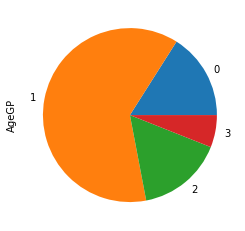

In [16]:
counts['AgeGP'].plot(kind = 'pie')

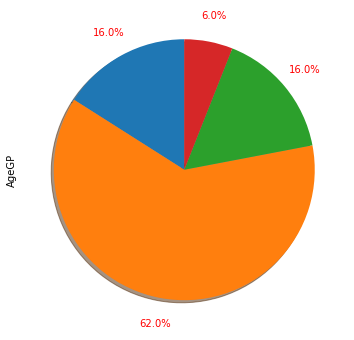

In [17]:
counts['AgeGP'].plot(kind = 'pie',
                     figsize = (15,6),
                     labels = None,
                     autopct = '%1.1f%%',#cantidad de decimales
                     textprops ={'color': 'r'},
                     pctdistance = 1.2,
                     startangle = 90,
                     shadow = True,
                    )


In [30]:
counts = counts.rename({'index':'Age_group'},
                       axis=1
                      )

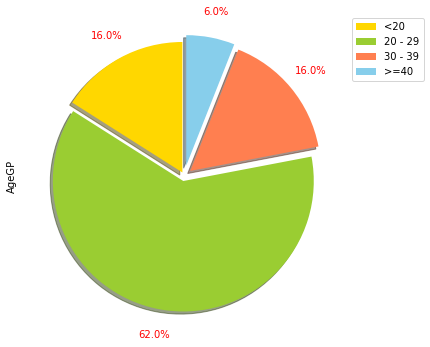

In [31]:
color_list = ['gold','yellowgreen','coral', 'skyblue','lightgreen','pink'] #colores para cada area 
explode_list = [0.03, 0.04, 0.06, 0.08] #esto es para separar las areas los numeros pueden ser iguales o distintos

counts['AgeGP'].plot(kind = 'pie',
                     figsize = (15,6),
                     labels = None,
                     autopct = '%1.1f%%',#cantidad de decimales
                     textprops ={'color': 'r'},
                     pctdistance = 1.2,
                     startangle = 90,
                     shadow = True,
                     colors = color_list,
                     explode = explode_list
                    )
plt.legend(labels = counts.Age_group, #esto es para agregarle la leyenda de la tabla que graficamos
           bbox_to_anchor = (1.0, 1.0)
          )



Text(0.5, 1.05, 'Number of respondents of different age groups')

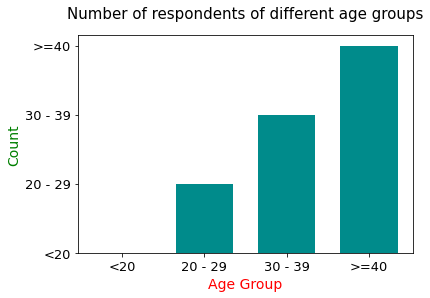

In [42]:
plt.bar(list(counts['Age_group']), #eje x 
       list(counts['Age_group']), #eje y
        width = 0.7,
        color = 'darkcyan'
       )
        
plt.xlabel('Age Group',
           fontweight = 'regular',
           color = 'red',
           fontsize = '14',
           horizontalalignment = 'center'
          )
        
plt.ylabel('Count',
           fontweight = 'regular',
           color = 'green',
           fontsize = '14',
           horizontalalignment = 'center'
          )

plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.title('Number of respondents of different age groups',
          y = 1.05,
          fontsize=15
         )

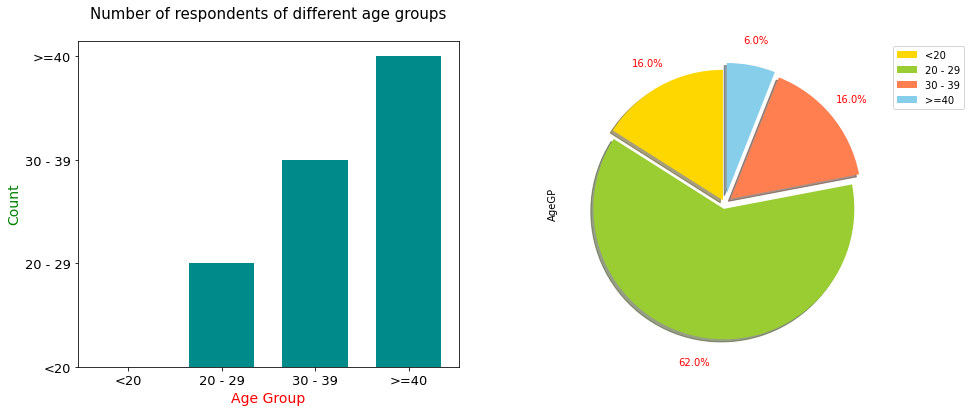

In [43]:
plt.subplot(1,2,1) #esta es la parte del codigo donde le digo que combine las dos graficas 

plt.bar(list(counts['Age_group']), #eje x 
       list(counts['Age_group']), #eje y
        width = 0.7,
        color = 'darkcyan'
       )
        
plt.xlabel('Age Group',
           fontweight = 'regular',
           color = 'red',
           fontsize = '14',
           horizontalalignment = 'center'
          )
        
plt.ylabel('Count',
           fontweight = 'regular',
           color = 'green',
           fontsize = '14',
           horizontalalignment = 'center'
          )

plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.title('Number of respondents of different age groups',
          y = 1.05,
          fontsize=15
         )

plt.subplot(1,2,2)
color_list = ['gold','yellowgreen','coral', 'skyblue','lightgreen','pink'] #colores para cada area 
explode_list = [0.03, 0.04, 0.06, 0.08] #esto es para separar las areas los numeros pueden ser iguales o distintos

counts['AgeGP'].plot(kind = 'pie',
                     figsize = (15,6),
                     labels = None,
                     autopct = '%1.1f%%',#cantidad de decimales
                     textprops ={'color': 'r'},
                     pctdistance = 1.2,
                     startangle = 90,
                     shadow = True,
                     colors = color_list,
                     explode = explode_list
                    )
plt.legend(labels = counts.Age_group, #esto es para agregarle la leyenda de la tabla que graficamos
           bbox_to_anchor = (1.0, 1.0)
          )

